## Download the required libraries
## Загружаем нужные библиотеки:


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Download the dataset:

### Загружаем данные:

In [2]:
from sklearn.datasets import fetch_openml

# Загружаем данные из https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', return_X_y = True, as_frame = False)

In [3]:
N, d = X.shape
N, d

(70000, 784)

In [4]:
28*28

784

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
y = y.astype('int8')
y

array([5, 0, 4, ..., 4, 5, 6], dtype=int8)

In [7]:
X[42,]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### Let's draw the images:
### Посмотрим на некоторые изображения:

In [8]:
def draw_digit(Img, digit_true, digit_pred = ''):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(Img, (28, 28)))
    plt.text(0, 27, str(digit_true), color = 'b')
    plt.text(0, 1, str(digit_pred), color = 'r')
    plt.set_cmap('binary')    
    #plt.set_cmap('gray')    

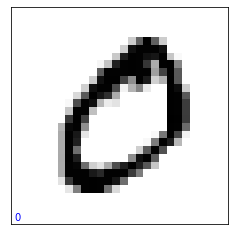

In [9]:
draw_digit(X[1, :], y[1])

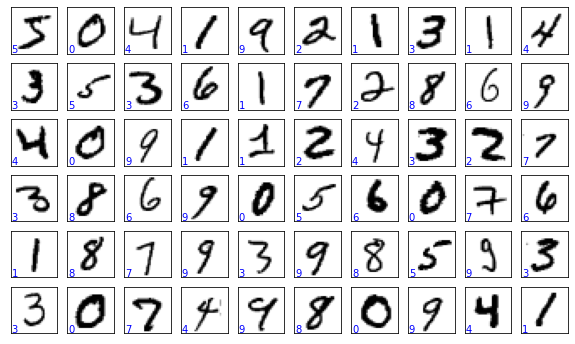

In [10]:
plt.figure(figsize = (10, 6))
for i_subplot in range(60):
    plt.subplot(6, 10, i_subplot + 1)
    draw_digit(X[i_subplot, :], y[i_subplot])

### Split the dataset onto a train test and a test set

### Разбиваем данные на обучающую и тестовую выборки


In [11]:
N_test = 10000
N_train = X.shape[0] - N_test

In [12]:
N_test, N_train

(10000, 60000)

Некоторые методы требуют для обучения много времени. Чтобы долго не ждать, возьмем не все данные, а только часть:

In [13]:
N_test = 1000
N_train = 6000

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = N_train, test_size = N_test, 
                                                    stratify = y, random_state = 42)

In [15]:
X_train.shape, X_test.shape

((6000, 784), (1000, 784))

### Let's train the (KNN) k-Nearest Neighbourhood model
### Обучаем классификатор kNN

*Евклидово расстояние* ($\ell_2$-метрика):
$$
\rho_2(x,x') = \sqrt{\sum_{j=1}^d (x_j - x_j')^2}
$$

*Манхеттеновское расстояние* ($\ell_1$-метрика):
$$
\rho_1(x,x') = \sum_{j=1}^d |x_j - x_j'|
$$


*Чебышевское расстояние* ($\ell_{\infty}$-метрика):
$$
\rho_{\infty}(x,x') = \max_{j=1,\dots,d} |x_j - x_j'|
$$

Приведенные выше метрики являются частным случаем *расстояния Минковского*:
$$
\rho_p(x,x') = \left(\sum_{j=1}^d |x_j - x_j'|^p\right)^{1/p} \qquad (p\ge 1)
$$


In [16]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7, p=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, p=1)

### Now we can classify using the model

### Теперь можем классифицировать:

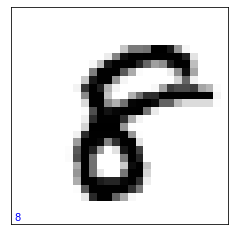

In [17]:
No = 42
Img = X_test[No, :]
dig = y_test[No]
draw_digit(Img, dig)

In [18]:
model.predict([Img])

array([8], dtype=int8)

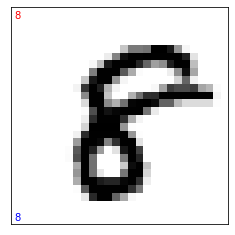

In [19]:
No = 0
Img = X_test[No, ]
dig = y_test[No]
dig_pred = model.predict([Img])[0]
draw_digit(Img, dig, dig_pred)

### Check the quality of the model

### Проверяем качество классификатора

In [20]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [21]:
y_train.shape

(6000,)

In [22]:
y_train != y_train_pred

array([False, False,  True, ...,  True,  True, False])

In [23]:
y_test != y_test_pred

array([ True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

Errors for train and test datasets:

Ошибки на обучающей и тестовой выборках:

In [24]:
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.05383333333333333, 0.072)

We can do the same by the following way:

Можно так:

Calculate the accuracy:

In [25]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9461666666666667, 0.928)

Compute the error:

In [26]:
1 - model.score(X_test, y_test)

0.07199999999999995

### Confusion matrix

### Матрица рассогласования:

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[ 97,   0,   0,   0,   0,   0,   2,   0,   0,   0],
       [  0, 112,   0,   0,   0,   0,   0,   0,   0,   1],
       [  0,   9,  85,   0,   0,   1,   0,   3,   0,   2],
       [  0,   1,   3,  95,   0,   1,   0,   0,   1,   1],
       [  0,   2,   0,   0,  91,   0,   1,   0,   0,   3],
       [  2,   2,   0,   0,   0,  83,   3,   0,   0,   0],
       [  1,   3,   0,   0,   0,   0,  94,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0, 100,   0,   3],
       [  1,   4,   0,   3,   1,   2,   1,   2,  82,   2],
       [  1,   2,   0,   0,   5,   0,   0,   2,   0,  89]], dtype=int64)

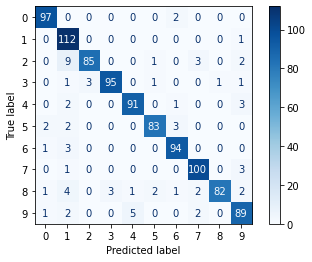

In [28]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
pass

### Other quality metrics:

### Другие метрики качества:

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        99
           1       0.82      0.99      0.90       113
           2       0.97      0.85      0.90       100
           3       0.97      0.93      0.95       102
           4       0.94      0.94      0.94        97
           5       0.95      0.92      0.94        90
           6       0.93      0.96      0.94        98
           7       0.93      0.96      0.95       104
           8       0.99      0.84      0.91        98
           9       0.88      0.90      0.89        99

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



Для бинарной классификации:

$$
\begin{array}{c|c|c|}
    &   f(x)=0 & f(x)=1 \\
\hline
y=0 & {\rm TN} & {\rm FP} \\
\hline
y=1 & {\rm FN} & {\rm TP} \\
\hline
\end{array}
$$

${\rm TN}$ – true negative

${\rm TP}$ – true positive

${\rm FP}$ – false positive, _ложные тревоги_ (ошибки 1-го рода или $\alpha$-ошибки)

${\rm FN}$ – false negative, _промахи_ (ошибки 2-го рода или $\beta$-ошибки)

${\rm error} = \frac{{\rm FP} + {\rm FN}}{{\rm TP} + {\rm TN} + {\rm FP} + {\rm FN}}$ 

${\rm accuracy} = \frac{{\rm TP} + {\rm TN}}{{\rm TP} + {\rm TN} + {\rm FP} + {\rm FN}} = 1 - {\rm error}$ 

$\alpha = {\rm FPR} = \frac{{\rm FP}}{{\rm TN}+{\rm FP}}$ – ``вероятность'' ошибки 1-го рода (_уровень значимости_)

$\beta = {\rm FNR} = \frac{{\rm FN}}{{\rm FN}+{\rm TP}}$ – ``вероятность'' ошибки 2-го рода

${\rm precision} = \frac{{\rm TP}}{{\rm FP}+{\rm TP}}$ – ``точность'' (не путать с accuracy) 

${\rm recall} = {\rm TPR} = \frac{{\rm TP}}{{\rm FN}+{\rm TP}} = 1 - {\rm FNR}$ – _чувствительность_, полнота, отклик (вероятность предсказать отсутствие болезни, при условии, что ее нет)

${\rm TNR} = \frac{{\rm TN}}{{\rm TN}+{\rm FP}} = 1 - {\rm FPR}$ – _специфичность_ (вероятность предсказать болезнь, при условии, что она есть)

$F_1 = 2\cdot\frac{{\rm precision}\cdot{\rm recall}}{{\rm precision}+{\rm recall}}$ 





- FP is the number of _false positive_ samples (classified erroneously as positive sample)
- FN is the number of _false negative_ samples (classified erroneously as negative sample)
- TP is the number of _true positive_ samples (classified correctly as positive sample)
- TN is the number of _true negativ_ samples (classified correctly as negative sample sample)

### All errors:

### Все ошибки:

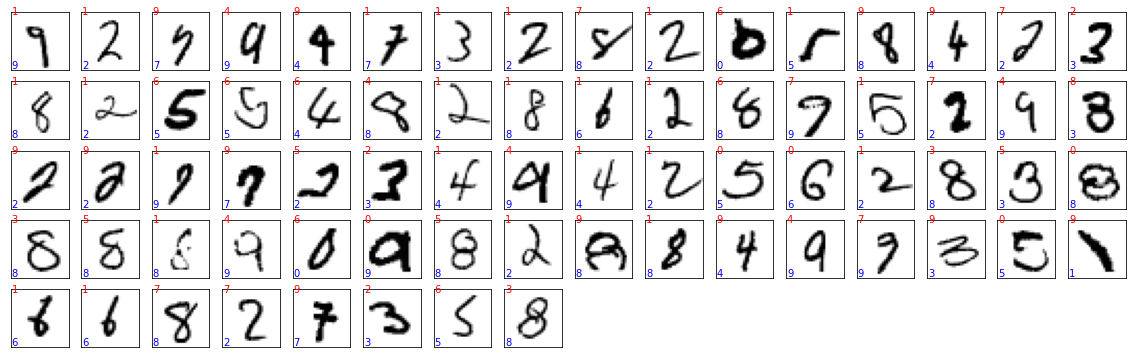

In [30]:
plt.figure(figsize = (20, 10))
i_subplot = 1 
for i in range(N_test):
    Img = X_test[i, :]
    dig = y_test[i]
    dig_pred = model.predict([Img])[0]
    if dig_pred != dig:
        plt.subplot(8, 16, i_subplot)
        draw_digit(Img, dig, dig_pred)
        i_subplot += 1

#### Machine Learning Methods in scikit-learn library

В библиотеке scikit-learn реализована масса алгоритмов машинного обучения.

#### Некоторые алгоритмы машинного обучения, реализованные в scikit-learn:

 Метод                                     |  Класс
-------------------------------------------|--------------------------------------------         
 kNN – $k$ ближайших соседей               | `sklearn.neighbors.KNeighborsClassifier`
 LDA – линейный дискриминантный анализ     | `sklearn.discriminant_analysis.LinearDiscriminantAnalysis`
 QDA – квадратичный дискриминантный анализ | `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis`
 Logistic – логистическая регрессия        | `sklearn.linear_model.LogisticRegression`
 SVC – машина опорных векторов             | `sklearn.svm.SVC`
 Tree – деревья решений                    | `sklearn.tree.DecisionTreeClassifier`
 RF – случайный лес                        | `sklearn.ensemble.RandomForestClassifier`
 ExtrRF – экстремально случайный лес       | `sklearn.ensemble.ExtraTreesClassifier`
 AdaBoost – алгоритм AdaBoost              | `sklearn.ensemble.AdaBoostClassifier`
 GBT – градиентный бустинг деревьев решений| `sklearn.ensemble.GradientBoostingClassifier`
 Нейронные сети                            | `sklearn.neural_network.MLPClassifier`
 



#### Основные методы классов, реализующих алгоритмы машинного обучения
Все алгоритмы выполнены в виде классов, обладающих по крайней мере следующими методами:



   Метод класса            |  Описание     
 --------------------------|-------------------------------------------------------------
  `fit(X_train, y_train)`              |  обучение (тренировка) модели на обучающей выборке `X_train`, `y_train`
  `predict(X)`             |  предсказание на данных `X`
  `set_params(**params)`   |  установка параметров алгоритма
  `get_params()`           |  чтение параметров алгоритма
 
 Заметим, что параметры алгоритмов обучения можно задавать как в конструкторе класса, так и с помощью метода `set_params(**params)`.
 
 #### Таблица наличия/отсутствия методов для основных алгоритмов машинного обучения:
 
    
   Методы класса               | kNN | LDA | QDA | Logistic | SVC | Tree | RF | AdaBoost | GBT     
 ------------------------------|-----|-----|-----|----------|-----|------|----|----------|------
  `fit(X, y)`                  |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict(X)`                 |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict_proba(X)`           |  +  |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `predict_log_proba(X)`       |     |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `score(X, y)`                |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `decision_function(X)`       |     |  +  |  +  |    +     |  +  |      |    |    +     |  +
  `transform(X)`               |     |  +  |     |    +     |     |  +   | +  |          |  +
  `staged_decision_function(X)`|     |     |     |          |     |      |    |    +     |  +    
  `staged_predict(X)`          |     |     |     |          |     |      |    |    +     |  +
  `staged_predict_proba(X)`    |     |     |     |          |     |      |    |    +     |  +
  `staged_score(X, y)`         |     |     |     |          |     |      |    |    +     |  +
  `set_params(**params)`       |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `get_params()`               |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
    
    

### Neural methods (MLP  - Multi Layer Perceptron)
### Нейронные сети (MLP - Multi Layer Perceptron)

In [33]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes = (30,), random_state = 42)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(30,), random_state=42)

In [34]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.042, 0.119)

In [35]:
model = MLPClassifier(hidden_layer_sizes = (1000, 500), random_state = 42)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(1000, 500), random_state=42)

In [36]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.0, 0.071)

### Подбор *гипер*параметров

### Choosing hyperpapameters

Подберем _оптимальное_ значение параметра регуляризации `alpha`

Let's try to find the optimal value for regularization parameter `alpha`

(Можно вместо циклов, написанных руками, использовать `sklearn.model_selection.GridSearchCV` и т.п.)

(Instead of using cycles you can use `sklearn.model_selection.GridSearchCV` etc.)

In [44]:
alpha_arr = np.logspace(-4, 5, 10)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = (30,), random_state = 42, alpha = alpha)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

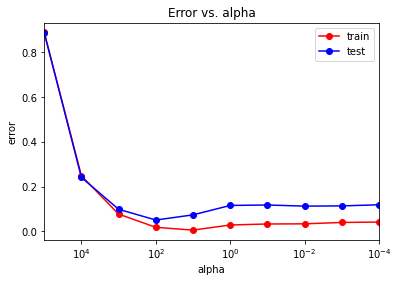

In [45]:
plt.semilogx(alpha_arr, train_err, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'b-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Минимальное значение ошибки:
Minimal errors:

In [46]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.006 0.051


Оптимальное значение `alpha`:

OPtimal value for `alpha` (when the test error is minimal)^

In [47]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[100.]


In [48]:
alpha_opt = alpha_opt[0]

### Классификатор при найденном _оптимальном_ значении `alpha`:

### Classifier for optimal value of `alpha`

Повторим обучение:

Repeat the training

In [50]:
mlp_model = MLPClassifier(hidden_layer_sizes = (30,), random_state = 42, alpha = alpha_opt)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0185
0.051


### Support vector machine

### Машина опорных векторов

In [37]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [38]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.016833333333333332, 0.041)

In [39]:
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [40]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.0, 0.089)

In [41]:
model = SVC(kernel = 'poly')
model.fit(X_train, y_train)

SVC(kernel='poly')

In [42]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.014666666666666666, 0.052)

### Логистическая регрессия

### Logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

C:\Users\nikol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [32]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.0, 0.124)

## Torch

In [51]:
import torch # библиотека нейронных сетей
import torch.nn as nn # модуль слоёв
import numpy as np

In [52]:
model = nn.Sequential(
    nn.Linear(d, 50),
    nn.ReLU(),
    nn.Linear(50, 10)
)
model

Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=10, bias=True)
)

In [54]:
from torch.utils.data import TensorDataset, DataLoader

# Функция обучения (несколько тренировочных эпох)
def train(model, X, y, loss_function, optimizer, batch_size=16, epochs=16):
    X_tensor = torch.Tensor(X)
    y_tensor = torch.LongTensor(y)
    model.train()
    dataset = TensorDataset(X_tensor, y_tensor)
    dataloader = DataLoader(dataset, batch_size = batch_size, shuffle = True)
    for _ in range(epochs):
        losses = []
        for X_batch, y_batch in dataloader:
            logits = model(X_batch)
            loss = loss_function(logits, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            losses.append(loss.data.numpy())
        print(np.mean(losses))

In [55]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [56]:
train(model, X_train, y_train, loss_function, optimizer)

0.24912915
0.12210508
0.22238645
0.24128892
0.17072904
0.32254058
0.2826753
0.43781775
0.18599056
0.0027136297
0.025597585
0.19193941
0.46170828
1.1887728
0.13204873
0.29221064


In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score

def print_confusion_matrix(model, X, y):
    model.eval()
    y_pred = model(torch.Tensor(X)).data.numpy().argmax(axis = 1)
    print(confusion_matrix(y, y_pred))
    accuracy = accuracy_score(y, y_pred)
    print(f"Accuracy = {accuracy}")
    return accuracy

In [58]:
print_confusion_matrix(model, X_test, y_test)

[[ 89   0   0   0   0   0   2   1   7   0]
 [  0 110   1   0   1   0   0   1   0   0]
 [  0   1  94   2   0   0   0   1   1   1]
 [  0   0   0  91   0   5   0   0   6   0]
 [  0   0   0   0  83   2   2   1   1   8]
 [  2   0   0   1   0  81   3   1   0   2]
 [  0   0   1   0   1   0  94   0   1   1]
 [  0   0   1   0   0   0   0 101   0   2]
 [  0   0   2   3   1   5   2   0  84   1]
 [  0   0   1   0   1   1   0   6   3  87]]
Accuracy = 0.914


0.914

## CNN

In [59]:
import torch
import torch.nn as nn

In [60]:
batch_size = 64

In [61]:
from torch.utils.data import DataLoader, TensorDataset

X_train_tensor = torch.Tensor(X_train).reshape(N_train, 1, 28, 28)
y_train_tensor = torch.LongTensor(y_train)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)

X_test_tensor = torch.Tensor(X_test).reshape(N_test, 1, 28, 28)
y_test_tensor = torch.LongTensor(y_test)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = True)

In [62]:
# Альтернатива
# Можем загрузить непсредственно из torch
from torchvision import datasets, transforms
train_dataset = datasets.MNIST(root='./data/', train=True,  transform=transforms.ToTensor(), download=True)
test_dataset  = datasets.MNIST(root='./data/', train=False, transform=transforms.ToTensor())

from torch.utils.data import DataLoader
# Data Loader (Input Pipeline)
batch_size = 64

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(dataset=test_dataset,  batch_size=batch_size, shuffle=False)

In [63]:
model = nn.Sequential(
    nn.Conv2d(in_channels = 1, out_channels = 8, kernel_size = 5), # 24x24
    nn.MaxPool2d(kernel_size = 3), # 8x8
    nn.ReLU(),
    nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = 5), # 4x4
    nn.MaxPool2d(kernel_size = 2), # 2x2
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(in_features = 64, out_features = 32),
    nn.ReLU(),
    nn.Linear(32, 10)
)
model

Sequential(
  (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
  (1): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (2): ReLU()
  (3): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): ReLU()
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=64, out_features=32, bias=True)
  (8): ReLU()
  (9): Linear(in_features=32, out_features=10, bias=True)
)

In [64]:
model = nn.Sequential(
    nn.Conv2d(in_channels = 1, out_channels = 8, kernel_size = 3), # 26x26
    nn.MaxPool2d(kernel_size = 2), # 13x13
    nn.ReLU(),
    nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = 5), # 9x9
    nn.MaxPool2d(kernel_size = 3), # 3x3
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(in_features = 16*3*3, out_features = 32),
    nn.ReLU(),
    nn.Linear(32, 10)
)
model

Sequential(
  (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): ReLU()
  (3): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (5): ReLU()
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=144, out_features=32, bias=True)
  (8): ReLU()
  (9): Linear(in_features=32, out_features=10, bias=True)
)

In [65]:
#optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
#loss_function = nn.CrossEntropyLoss()
#optimizer = torch.optim.Adam(model.parameters())
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [66]:
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [67]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        output = model(data)
        test_loss += loss_function(output, target).data
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [68]:
for epoch in range(32):
    train(epoch + 1)
    test()

C:\Users\nikol\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.320932
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.570624
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.191438
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.213023
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.326095
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.146031
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.142494
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.094797
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.129686
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.054838

Test set: Average loss: 0.0017, Accuracy: 9650/10000 (96.50%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.156572
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.039931
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.052824
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.113921
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.038999
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.008960
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.138621
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.080485
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.02508

Train Epoch: 15 [44800/60000 (75%)]	Loss: 0.037499
Train Epoch: 15 [51200/60000 (85%)]	Loss: 0.032328
Train Epoch: 15 [57600/60000 (96%)]	Loss: 0.001287

Test set: Average loss: 0.0007, Accuracy: 9856/10000 (98.56%)

Train Epoch: 16 [0/60000 (0%)]	Loss: 0.069071
Train Epoch: 16 [6400/60000 (11%)]	Loss: 0.003627
Train Epoch: 16 [12800/60000 (21%)]	Loss: 0.026610
Train Epoch: 16 [19200/60000 (32%)]	Loss: 0.059686
Train Epoch: 16 [25600/60000 (43%)]	Loss: 0.007234
Train Epoch: 16 [32000/60000 (53%)]	Loss: 0.060953
Train Epoch: 16 [38400/60000 (64%)]	Loss: 0.008952
Train Epoch: 16 [44800/60000 (75%)]	Loss: 0.022335
Train Epoch: 16 [51200/60000 (85%)]	Loss: 0.006362
Train Epoch: 16 [57600/60000 (96%)]	Loss: 0.057925

Test set: Average loss: 0.0008, Accuracy: 9842/10000 (98.42%)

Train Epoch: 17 [0/60000 (0%)]	Loss: 0.011068
Train Epoch: 17 [6400/60000 (11%)]	Loss: 0.003774
Train Epoch: 17 [12800/60000 (21%)]	Loss: 0.013149
Train Epoch: 17 [19200/60000 (32%)]	Loss: 0.009368
Train Epoch: 17 [

Train Epoch: 30 [6400/60000 (11%)]	Loss: 0.010184
Train Epoch: 30 [12800/60000 (21%)]	Loss: 0.000256
Train Epoch: 30 [19200/60000 (32%)]	Loss: 0.001517
Train Epoch: 30 [25600/60000 (43%)]	Loss: 0.000938
Train Epoch: 30 [32000/60000 (53%)]	Loss: 0.029927
Train Epoch: 30 [38400/60000 (64%)]	Loss: 0.002078
Train Epoch: 30 [44800/60000 (75%)]	Loss: 0.000121
Train Epoch: 30 [51200/60000 (85%)]	Loss: 0.002434
Train Epoch: 30 [57600/60000 (96%)]	Loss: 0.003023

Test set: Average loss: 0.0010, Accuracy: 9849/10000 (98.49%)

Train Epoch: 31 [0/60000 (0%)]	Loss: 0.005464
Train Epoch: 31 [6400/60000 (11%)]	Loss: 0.024799
Train Epoch: 31 [12800/60000 (21%)]	Loss: 0.000264
Train Epoch: 31 [19200/60000 (32%)]	Loss: 0.003900
Train Epoch: 31 [25600/60000 (43%)]	Loss: 0.014097
Train Epoch: 31 [32000/60000 (53%)]	Loss: 0.013981
Train Epoch: 31 [38400/60000 (64%)]	Loss: 0.012970
Train Epoch: 31 [44800/60000 (75%)]	Loss: 0.003326
Train Epoch: 31 [51200/60000 (85%)]	Loss: 0.041498
Train Epoch: 31 [57600/60

In [69]:
def print_confusion_matrix(loader):
    model.eval()

    confusion_matrix = torch.zeros(10, 10, dtype=torch.int)
    for data, target in loader:
        output = model(data)
        _, preds = torch.max(output, 1)
        for t, p in zip(target.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1
    print(confusion_matrix)
    accuracy = confusion_matrix.diagonal().sum()/confusion_matrix.sum()
    print(f"Accuracy = {100*accuracy:.2f}%")

In [70]:
print_confusion_matrix(test_loader)

tensor([[ 973,    0,    1,    0,    0,    0,    1,    3,    1,    1],
        [   0, 1130,    2,    0,    0,    0,    1,    2,    0,    0],
        [   2,    0, 1024,    0,    1,    0,    0,    4,    1,    0],
        [   0,    0,    7,  992,    0,    6,    0,    5,    0,    0],
        [   0,    0,    0,    0,  973,    0,    1,    1,    1,    6],
        [   2,    0,    0,    5,    0,  878,    2,    0,    1,    4],
        [   2,    2,    0,    1,    0,    3,  948,    0,    0,    2],
        [   0,    2,    4,    2,    0,    0,    0, 1013,    0,    7],
        [   3,    0,    4,    3,    1,    2,    1,    4,  944,   12],
        [   1,    0,    0,    0,    1,    4,    0,    4,    2,  997]],
       dtype=torch.int32)
Accuracy = 98.72%
